In [ ]:
import math
import time
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.arange(0, 10, 0.1)
y = [math.sin(x) + random.randint(65, 135) / 100 for x in X]
y[0] = y[0] - 0.6

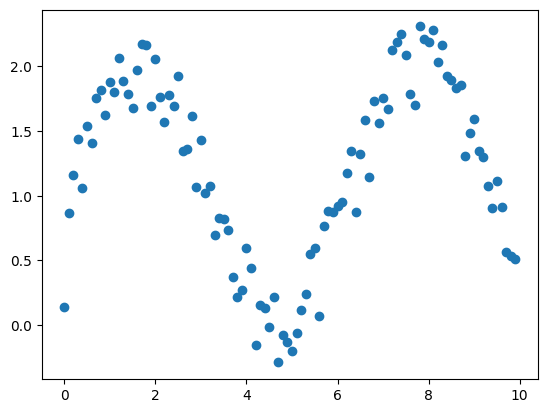

In [ ]:
plt.scatter(X, y)

# Самописное решающее дерево

In [ ]:
class DecisionTreeRegressor:
  def fit(self, x, y, min_width=2, accuracy=0.97):
    start_time = time.time()
    self.__x = x
    self.__y = y
    leafs = []
    first_index = 0
    last_index = min_width
    node = y[:last_index]
    center = self.search_cluster_center(node, accuracy)

    while True:
      next_value = y[last_index]
      difference_to_center = center / next_value if center < next_value else next_value / center
      if difference_to_center > accuracy:
        node.append(next_value)
      else:
        leafs.append([x[last_index - 1], center])
        first_index = last_index
        last_index = first_index + min_width if first_index + min_width < len(x) else len(y)
        node = y[first_index:last_index]
        center = self.search_cluster_center(node, accuracy)

      if last_index >= len(y):
        break

      last_index += 1

    leafs.append([x[last_index - 1], center])
    self.__leafs = np.array(leafs)
    elapsed = time.time() - start_time
    print(f'На обучение затрачено {elapsed} секунд.')

  def search_cluster_center(self, node, accuracy):
    total_sum = sum(node)

    # Xранит средние значения точек без одной.
    # Индекс в массиве - точка, которая не учитывается
    if len(node) - 1 != 0:
      centers_without_value = [(total_sum - value) / (len(node) - 1) for value in node]
      centers_without_value.sort(reverse=True)
    else:
      centers_without_value = node

    node_without_noise = [] # хранит только те значения, которые не являются шумом
    for i in range(len(centers_without_value) - 1):
      if centers_without_value[i + 1] / centers_without_value[i] > accuracy:
        node_without_noise.append(node[i + 1])

    if not node_without_noise:
      return sum(node) / len(node)

    return sum(node_without_noise) / len(node_without_noise)

  def draw_plot(self):
    borders = []
    for i in range(len(self.__leafs) - 1):
      x, y = self.__leafs[i]
      borders.append([x, y])
      dot = [self.__leafs[i][0], self.__leafs[i + 1][1]]
      borders.append(dot)
    x, y = self.__leafs[-1]
    borders.append([x, y])

    border_x = [border[0] for border in borders]
    border_y = [border[1] for border in borders]

    plt.figure()
    plt.scatter(self.__x, self.__y)
    plt.plot(border_x, border_y, color='red', marker='D')
    plt.show()

  def predict(self, x):
    for value in x:
      for border in self.__leafs:
        if value < border[0]:
          print(f'Для координаты по оси Х {value: .2f} соответствует значение {border[1]: .2f} по оси У')
          break
  def get_nodes(self):
    print('Граничные значения:\n',self.__leafs)

На обучение затрачено 0.00017261505126953125 секунд.


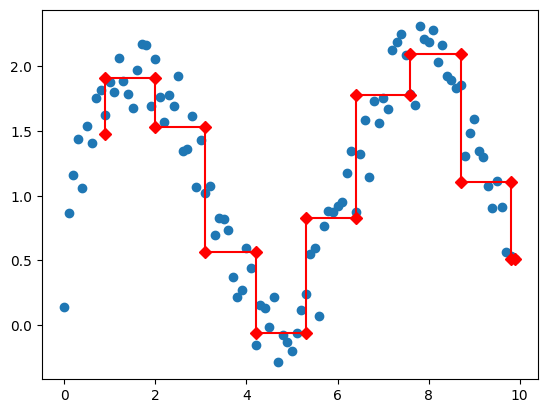

Граничные значения:
 [[ 0.9         1.47407207]
 [ 2.          1.91234839]
 [ 3.1         1.53181952]
 [ 4.2         0.56589336]
 [ 5.3        -0.0614893 ]
 [ 6.4         0.83068641]
 [ 7.6         1.77863474]
 [ 8.7         2.09301314]
 [ 9.8         1.10276226]
 [ 9.9         0.51246411]]
Для координаты по оси Х  2.30 соответствует значение  1.53 по оси У
Для координаты по оси Х  5.90 соответствует значение  0.83 по оси У


In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X, y, 10, 0.97)
dtr.draw_plot()
dtr.get_nodes()
dtr.predict([2.3, 5.9])